# ScrewFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pythonpackage import pdb
from pythonpackage.plot import plot_distances
from notebookstyle import css_styling
css_styling()

## Vizualization of the molecule

Here is a example with the PDB file "3PQR" but you can choose another PDB file from the [Protein Data Bank](http://www.rcsb.org/)

In [2]:
molecule = pdb.Pdb("3pqr")
# A case with missing residues:
#molecule = pdb.Pdb("5ofb")

Checking the molecule conformity ...
No missing residues within the protein were found.


In [3]:
molecule.show()

A Jupyter Widget

Note: you can interact with the molecule.

## Loading the PDB file in a DataFrame

In [4]:
df = molecule.atoms()
df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,A,1,,...,-68.369,-25.337,40.428,1.0,94.93,,,N,NaN,577
1,ATOM,2,,CA,,MET,,A,1,,...,-67.927,-23.984,39.965,1.0,96.06,,,C,NaN,578
2,ATOM,3,,C,,MET,,A,1,,...,-67.471,-23.097,41.120,1.0,94.71,,,C,NaN,579
3,ATOM,4,,O,,MET,,A,1,,...,-68.051,-23.124,42.213,1.0,97.40,,,O,NaN,580
4,ATOM,5,,CB,,MET,,A,1,,...,-69.034,-23.292,39.172,1.0,96.16,,,C,NaN,581


In [5]:
molecule.description()

The molecule contains 2 chains (A, B) with 326, 11 residues respectively.


## Measure the hydrophobicity of the molecule

In [6]:
print(f"The percentage of hydrophobic residues in the molecule is {molecule.hydrophobicity()[0]:.2f} %.")

The percentage of hydrophobic residues in the molecule is 53.41 %.


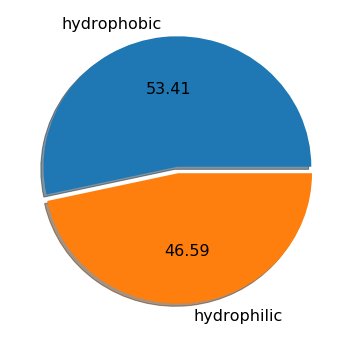

In [7]:
explode = (0.05, 0)
ax = molecule.hydrophobicity()[1].plot.pie(figsize = (6,6),
                                                               autopct='%.2f', fontsize=16,
                                                               shadow=True, explode=explode)
ax.set_ylabel('');

### Extract the coordinates of the carbon-$\alpha$

In [8]:
molecule.ca(chain_id_as_index=True).coordinates().head()

,x_coord,y_coord,z_coord
chain_id,,,
A,-67.927,-23.984,39.965
A,-65.839,-21.504,41.945
A,-65.193,-18.522,39.679
A,-67.320,-15.906,37.947
A,-66.585,-14.969,34.333


### Compute the distances between the carbon-$\alpha$

In [9]:
coord = molecule.ca(chain_id_as_index=True).coordinates()
coord.head()

,x_coord,y_coord,z_coord
chain_id,,,
A,-67.927,-23.984,39.965
A,-65.839,-21.504,41.945
A,-65.193,-18.522,39.679
A,-67.320,-15.906,37.947
A,-66.585,-14.969,34.333


In [10]:
ca_distances = molecule.ca(chain_id_as_index=True).distances()
ca_distances.head()

chain_id
A    3.798756
A    3.800578
A    3.790437
A    3.805153
A    3.795218
dtype: float64

In [11]:
#d = df[(df['chain_id'] == 'A') & (df['atom_name']=='CA')].filter(regex='coord$', axis='columns').diff().dropna().pow(2).sum(axis='columns').pow(1/2)
#d[d>4]

## Histogram of nearest-neighbor C-$\alpha$ distances

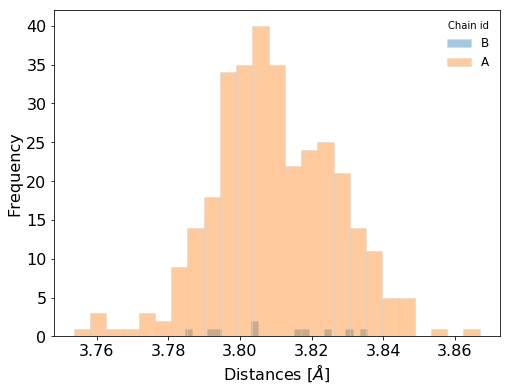

In [12]:
plot_distances(ca_distances)

## MSD (Mean-Square Displacement) for the C-$\alpha$ atoms

In [13]:
msd = molecule.msd()

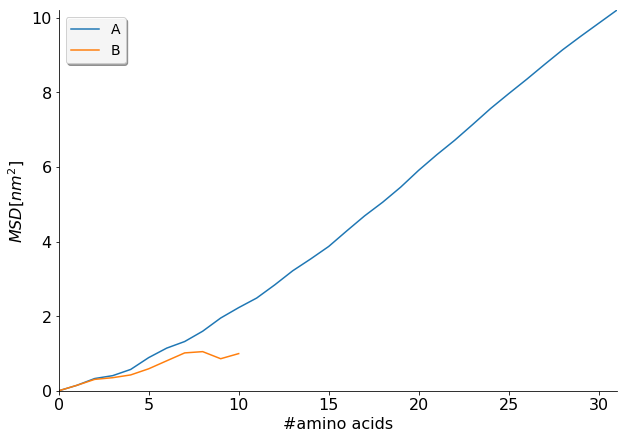

In [14]:
msd.plot(percentage=0.1)